# wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import jieba
from wordcloud import WordCloud

In [4]:
# get the data
df = pd.read_csv('F:\Python\data\words_data\house_news.csv',encoding='utf-8')
df.head()

,Unnamed: 0,content
0,0,本报讯(记者 朱开云)北京青年报记者昨日从市住建委获悉，今年，我市将进一步调整用地结构，...
1,1,据市住建委相关负责人介绍，自住型商品房作为北京独有的一种房屋类型，本市坚持每年安排一定供...
2,2,从2013年本市推出自住房以来，已累计推出项目69个，分配项目59个，已摇号签约5.6万...
3,3,自2014年10月份开始，本市对自住型商品房开展设计方案的专家审查工作，对于未通过审查的...
4,4,那么普通家庭如何申购自住房呢？据了解，在自住房的配售中，首先在市住建委官网发布项目申购公...


In [6]:
# drop the nan rows
df = df.dropna()
# pick up the content
content = df.content.values.tolist()

In [10]:
# split words
words=[]
for line in content:
    try:
        word = jieba.lcut(line)
        for wd in word:
            if len(wd) > 1 and wd != '\r\n':
                words.append(wd)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\FZH\AppData\Local\Temp\jieba.cache
Loading model cost 2.517 seconds.
Prefix dict has been built succesfully.


In [13]:
# stop words
words_df = pd.DataFrame({'words':words})
stopwords = pd.read_csv('F:\Python\data\words_data\stopwords.txt',index_col=False,
                       quoting=3,sep="\t",names=['stopword'],encoding='utf-8')
words_df = words_df[~words_df.words.isin(stopwords.stopword)]

In [19]:
# calculate words
words_state = words_df.groupby(by=['words'])['words'].agg({'count':np.size})
words_state = words_state.reset_index().sort_values(by=['count'],ascending=False)
words_state.head(10)

C:\Users\FZH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,words,count
17858,房地产,4562
15854,市场,4243
13220,城市,3971
7744,住房,3806
32054,项目,2412
19504,政策,2383
10367,北京,2319
17786,房价,2164
28809,调控,2128
31046,销售,1980


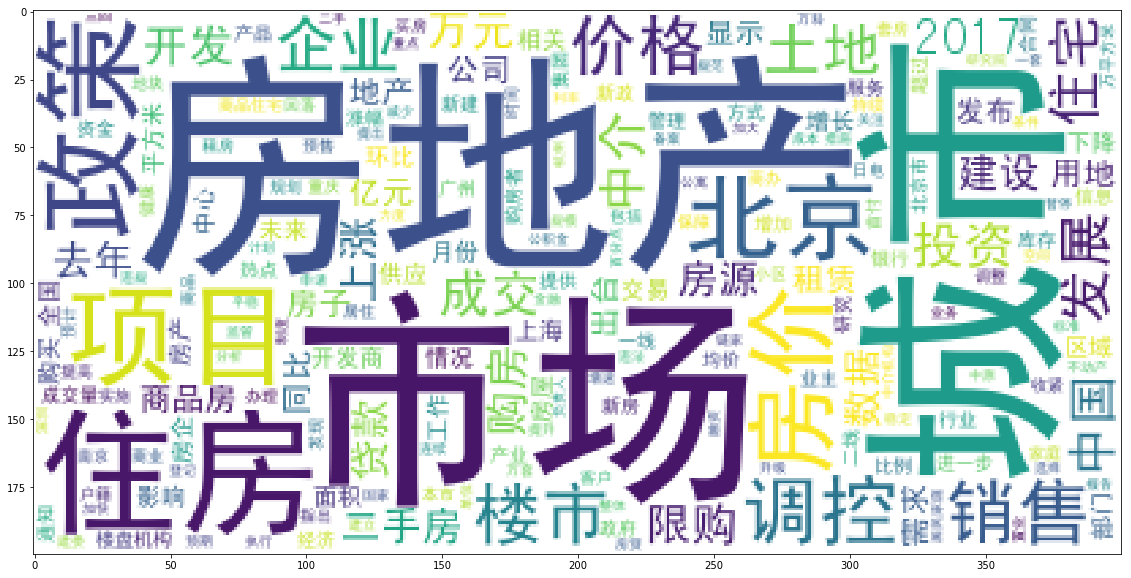

In [24]:
# wordcloud
wordcloud = WordCloud(font_path='F:\Python\data\words_data\simhei.ttf',
                      background_color='white',max_font_size=90)
word_count = {x[0]:x[1] for x in words_state.head(1000).values}
wordcloud = wordcloud.fit_words(word_count)
plt.imshow(wordcloud)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

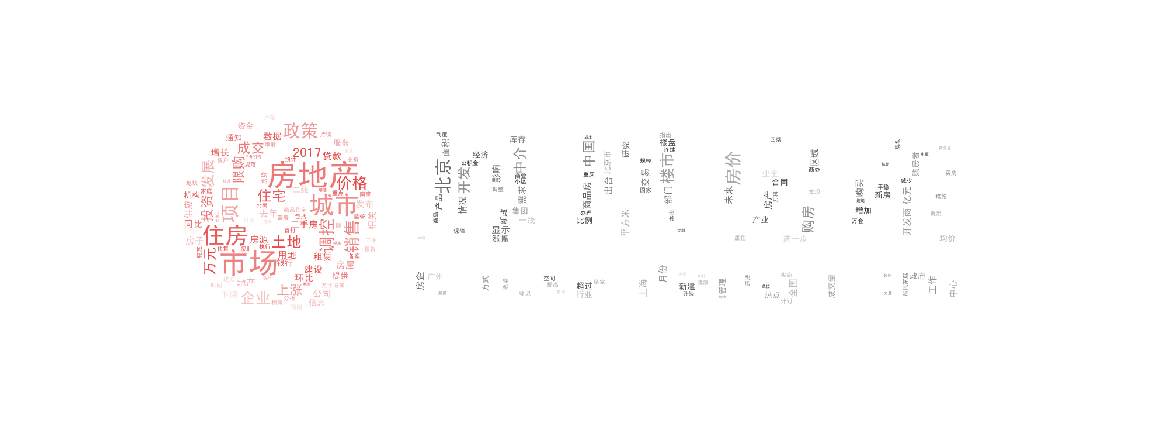

In [27]:
# use a picture as background
from scipy.misc import imread
from wordcloud import ImageColorGenerator
bing = imread('F:\Python\data\words_data\house_fenghuang.jpg')
wordcloud = WordCloud(background_color='white',mask=bing,
                      font_path='F:\Python\data\words_data\simhei.ttf',
                     max_font_size=200)
word_count = {x[0]:x[1] for x in words_state.head(1000).values}
wordcloud = wordcloud.fit_words(word_count)
bingColor = ImageColorGenerator(bing)
plt.axis('off')
plt.imshow(wordcloud.recolor(color_func=bingColor))
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)